# Import Important Modules

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
import warnings
import pickle

sys.path.append(os.path.abspath(os.path.join('../scripts')))

from clean_dataframe import Utility
from plot_dataframe import Plotter

plot = Plotter()
cleaner = Utility()

In [30]:
warnings.filterwarnings('ignore')

# Read Data

In [31]:
df = pd.read_csv("../data/clean_data.csv")

In [32]:
#select relevant columns to analyze user engagment
tellco_engagement_df = df[['MSISDN/Number','Bearer Id', 'Dur (ms)', 'Total Data Volume (Bytes)' ,'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)']]
tellco_engagement_df

,MSISDN/Number,Bearer Id,Dur (ms),Total Data Volume (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
0,33659219748,-9223372036854775808,150103745.0,872988322.0,1585413.0,8778341.0,766046.0,22911539.0,13185350.0,812946425.0,77671250.0
1,33664473872,-9223372036854775808,150103745.0,568809782.0,839351.0,8822396.0,2348652.0,19623308.0,20124838.0,505668618.0,538369717.0
2,33659219748,-9223372036854775808,150103745.0,331143097.0,2480347.0,7991932.0,3672362.0,25308492.0,26233613.0,255096405.0,50438697.0
3,33753758738,7277825621540039680,150103745.0,101047021.0,2066962.0,6491896.0,2653810.0,26558004.0,5557753.0,42366688.0,152500509.0
4,33658752999,-9223372036854775808,150103745.0,448432970.0,3193807.0,10756348.0,1044493.0,25470580.0,33305076.0,374527977.0,161491704.0
...,...,...,...,...,...,...,...,...,...,...,...
49504,33665236895,-9223372036854775808,112955761.0,277766716.0,2813960.0,10052658.0,3406371.0,17734661.0,14878136.0,213628621.0,167576122.0
49505,33666584437,6917537700006739968,86397115.0,686350978.0,2107354.0,6207296.0,1926658.0,37972679.0,27543879.0,595066930.0,50776648.0
49506,33685838753,7349883264234510336,86399970.0,365252706.0,566630.0,10068653.0,1546212.0,15092192.0,18411806.0,303654117.0,47215514.0
49507,33761274518,-9223372036854775808,83844645.0,406370744.0,1001569.0,3993510.0,3664570.0,9302481.0,5472754.0,373592725.0,633549896.0


In [33]:
# Group the dataframe with Number(User)
tellco_engagement_df = tellco_engagement_df.groupby(
    'MSISDN/Number').agg({'Bearer Id': 'count', 'Dur (ms)': 'sum', 'Total Data Volume (Bytes)': 'sum'})
tellco_engagement_df = tellco_engagement_df.rename(
    columns={'Bearer Id': 'number of xDR Sessions'})
tellco_engagement_df

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33601008617,1,18555323.0,871832580.0
33601011634,1,64180392.0,199050991.0
33601021217,1,38416201.0,630092434.0
33601031129,1,55730653.0,637053075.0
33601034530,1,56313873.0,775900974.0
...,...,...,...
33789914536,1,86399921.0,366089210.0
33789922012,1,54339643.0,576824365.0
33789942399,1,36812757.0,193917233.0


# Top 10 Numbers (Users) with highest number of xDR Sessions 

In [34]:
tellco_engagement_df.sort_values('number of xDR Sessions',ascending=False).head(10)

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33659822913,10,1.501037e+09,3.299376e+09
33675877202,9,1.320847e+09,4.602815e+09
33681557919,9,1.350934e+09,3.791379e+09
33603127838,9,1.350934e+09,3.737505e+09
33614892860,9,1.305621e+09,5.295689e+09
33668929914,8,1.152202e+09,4.849671e+09
33604515716,8,1.200830e+09,4.139835e+09
33659725664,8,1.200830e+09,3.046186e+09
33659546392,7,9.233186e+08,4.612115e+09


# Top 10 Numbers (Users) with highest number of Duration

In [35]:
tellco_engagement_df.sort_values('Dur (ms)',ascending=False).head(10)

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33659822913,10,1.501037e+09,3.299376e+09
33603127838,9,1.350934e+09,3.737505e+09
33681557919,9,1.350934e+09,3.791379e+09
33675877202,9,1.320847e+09,4.602815e+09
33614892860,9,1.305621e+09,5.295689e+09
33604515716,8,1.200830e+09,4.139835e+09
33659725664,8,1.200830e+09,3.046186e+09
33668929914,8,1.152202e+09,4.849671e+09
33660214653,7,1.050726e+09,2.604889e+09


# Top 10 Numbers with highest number of total Data Volume

In [36]:
tellco_engagement_df.sort_values('Total Data Volume (Bytes)',ascending=False).head(10)

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,
33614892860,9,1.305621e+09,5.295689e+09
33668929914,8,1.152202e+09,4.849671e+09
33659546392,7,9.233186e+08,4.612115e+09
33675877202,9,1.320847e+09,4.602815e+09
33665354456,6,5.821053e+08,4.600483e+09
33665550456,6,5.183998e+08,4.380360e+09
33699382524,6,5.183997e+08,4.267854e+09
33604515716,8,1.200830e+09,4.139835e+09
33668546821,6,8.339723e+08,4.076533e+09


# Normalizing the dataframe

In [37]:
selected_metrics = tellco_engagement_df
scale_data = StandardScaler().fit_transform(selected_metrics)
scale_data

array([[-0.35857882, -0.82603254,  0.51950116],
       [-0.35857882, -0.31341552, -0.92897736],
       [-0.35857882, -0.60288714, -0.0009581 ],
       ...,
       [-0.35857882, -0.62090252, -0.94003019],
       [-0.35857882, -0.67650075, -0.55736473],
       [-0.35857882, -0.93551765,  0.1810738 ]])

In [38]:
normalized_data = normalize(scale_data)
normalized_data

array([[-0.3449165 , -0.79455964,  0.4997075 ],
       [-0.34348663, -0.30022421, -0.88987772],
       [-0.5111859 , -0.85946908, -0.00136586],
       ...,
       [-0.30329764, -0.52517957, -0.79510814],
       [-0.37863055, -0.71433068, -0.58853257],
       [-0.35219846, -0.91887156,  0.17785187]])

Text(0.5, 1.0, 'Normalized data')

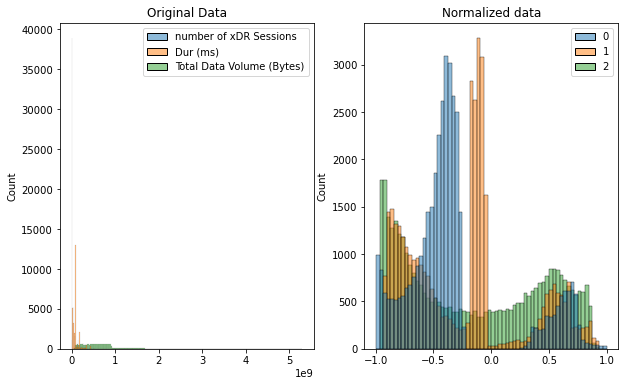

In [39]:
fig, ax=plt.subplots(1,2, figsize=(10, 6))
sns.histplot(selected_metrics, ax=ax[0])
ax[0].set_title("Original Data")
sns.histplot(normalized_data, ax=ax[1])
ax[1].set_title("Normalized data")

# K-means Clustering

In [40]:
#We choose 3 as the number of clusters needed 
kmeans = KMeans(n_clusters = 3, random_state = 42)
y_kmeans = kmeans.fit_predict(normalized_data)
X = np.array(normalized_data)
y_kmeans

array([0, 1, 0, ..., 1, 1, 0])

In [41]:
clustered_tellco_engagement_df = tellco_engagement_df.copy()
clustered_tellco_engagement_df.insert(0, 'Cluster', y_kmeans)
clustered_tellco_engagement_df

,Cluster,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
MSISDN/Number,,,,
33601008617,0,1,18555323.0,871832580.0
33601011634,1,1,64180392.0,199050991.0
33601021217,0,1,38416201.0,630092434.0
33601031129,0,1,55730653.0,637053075.0
33601034530,0,1,56313873.0,775900974.0
...,...,...,...,...
33789914536,1,1,86399921.0,366089210.0
33789922012,0,1,54339643.0,576824365.0
33789942399,1,1,36812757.0,193917233.0


In [42]:
clustered_tellco_engagement_df['Cluster'].value_counts()

1    19233
0    12986
2     6692
Name: Cluster, dtype: int64

cluster 0 have the highest number of users inside

# Min , Max , Average and Total of Clusters

In [43]:
min_of_clusters = clustered_tellco_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'min','Dur (ms)': 'min','Total Data Volume (Bytes)': 'min'})
min_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,1,7146574.0,524276853.0
1,1,7189000.0,38022357.0
2,1,32091844.0,119768539.0


<AxesSubplot:ylabel='number of xDR Sessions'>

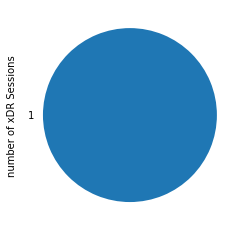

In [44]:
min_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Dur (ms)'>

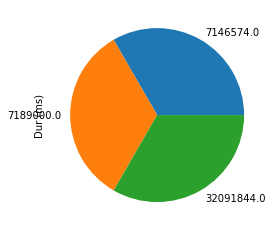

In [45]:
min_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Total Data Volume (Bytes)'>

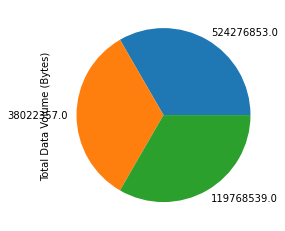

In [46]:
min_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='pie')

In [47]:
max_of_clusters = clustered_tellco_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'max','Dur (ms)': 'max','Total Data Volume (Bytes)': 'max'})
max_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,1,1.242554e+08,9.495983e+08
1,2,1.501037e+08,6.229848e+08
2,10,1.501037e+09,5.295689e+09


<AxesSubplot:ylabel='number of xDR Sessions'>

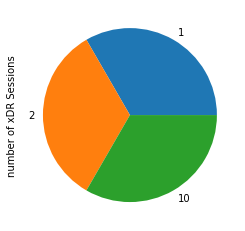

In [48]:
max_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Dur (ms)'>

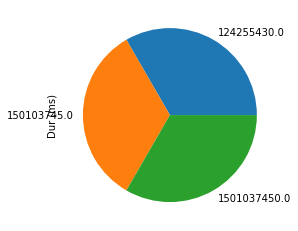

In [49]:
max_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Total Data Volume (Bytes)'>

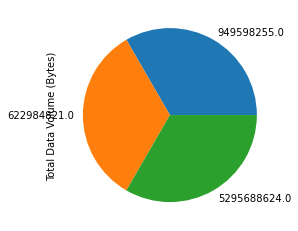

In [50]:
max_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='pie')

In [51]:
mean_of_clusters = clustered_tellco_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'mean','Dur (ms)': 'mean','Total Data Volume (Bytes)': 'mean'})
mean_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,1.000000,5.679545e+07,7.440142e+08
1,1.000208,6.431629e+07,3.234371e+08
2,2.583084,2.403192e+08,1.292948e+09


<AxesSubplot:ylabel='number of xDR Sessions'>

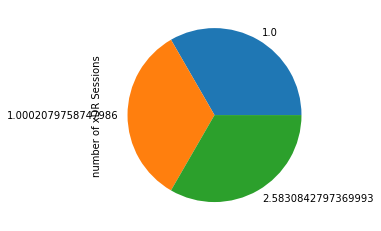

In [52]:
mean_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Dur (ms)'>

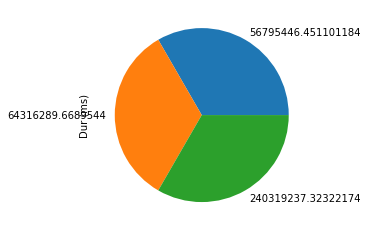

In [53]:
mean_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Total Data Volume (Bytes)'>

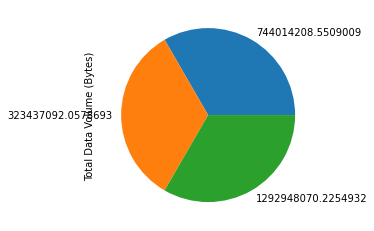

In [54]:
mean_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='pie')

In [55]:
total_of_clusters = clustered_tellco_engagement_df.groupby('Cluster').agg({'number of xDR Sessions': 'sum','Dur (ms)': 'sum','Total Data Volume (Bytes)': 'sum'})
total_of_clusters

,number of xDR Sessions,Dur (ms),Total Data Volume (Bytes)
Cluster,,,
0,12986,7.375457e+11,9.661769e+12
1,19237,1.236995e+12,6.220666e+12
2,17286,1.608216e+12,8.652408e+12


<AxesSubplot:ylabel='number of xDR Sessions'>

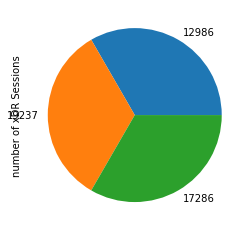

In [56]:
total_of_clusters['number of xDR Sessions'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Dur (ms)'>

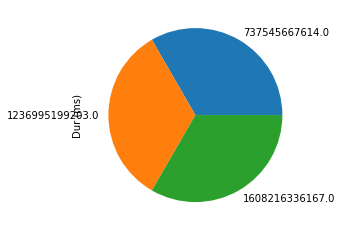

In [57]:
total_of_clusters['Dur (ms)'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='Total Data Volume (Bytes)'>

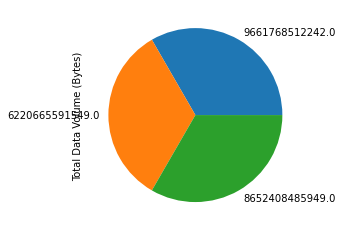

In [58]:
total_of_clusters['Total Data Volume (Bytes)'].value_counts().plot(kind='pie')

Dur (ms) vs number of xdr sessions based on clusters

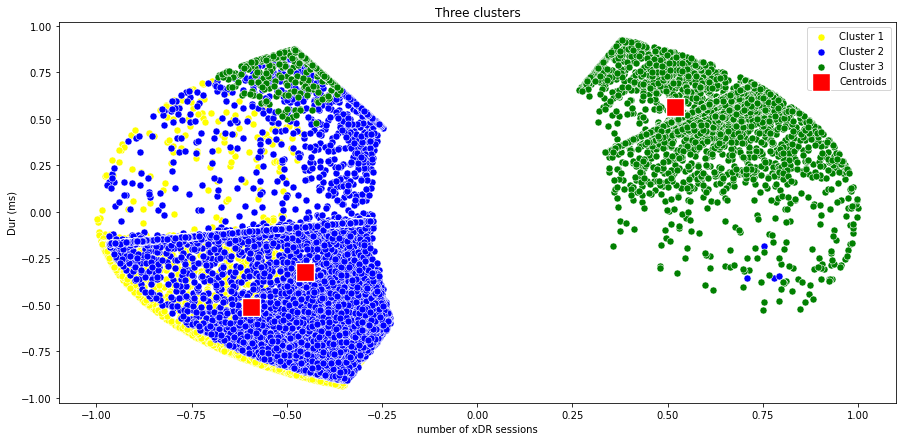

In [59]:

# size of image
plt.figure(figsize=(15,7))

# visualizing the clusters
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')

# labeling
# plt.grid(False)
plt.title('Three clusters')
plt.xlabel('number of xDR sessions')
plt.ylabel('Dur (ms)')
plt.legend()
plt.show()

Dur (ms) vs Total data (Bytes) based on clusters

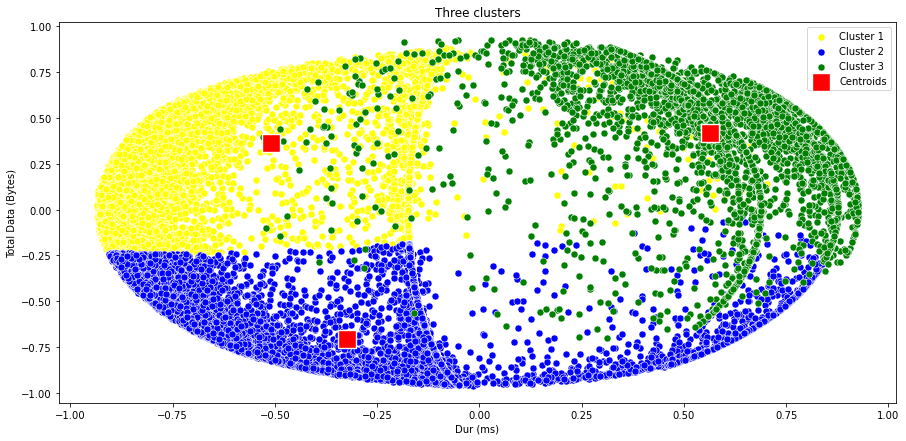

In [60]:

# size of image
plt.figure(figsize=(15,7))

# visualizing the clusters
sns.scatterplot(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], color = 'red', 
                label = 'Centroids',s=300,marker=',')

# labeling
# plt.grid(False)
plt.title('Three clusters')
plt.xlabel('Dur (ms)')
plt.ylabel('Total Data (Bytes)')
plt.legend()
plt.show()

Total data vs number of xdr sessions based on clusters

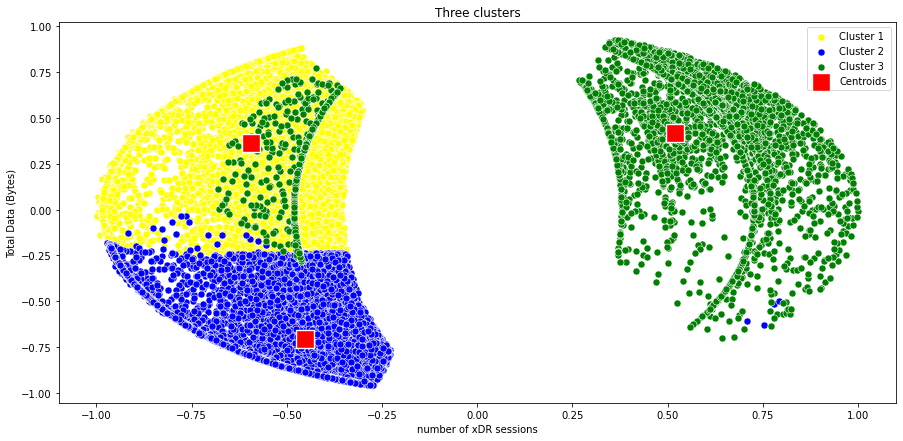

In [61]:
# size of image
plt.figure(figsize=(15,7))

# visualizing the clusters
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], color = 'red', 
                label = 'Centroids',s=300,marker=',')

# labeling
# plt.grid(False)
plt.title('Three clusters')
plt.xlabel('number of xDR sessions')
plt.ylabel('Total Data (Bytes)')
plt.legend()
plt.show()

# Application Engagement Analysis

In [63]:
# choose relevant columns and groupby user (number)
df = df[['MSISDN/Number','Total Data Volume (Bytes)' ,'Social Media Data Volume (Bytes)', 'Google Data Volume (Bytes)',
    'Email Data Volume (Bytes)', 'Youtube Data Volume (Bytes)', 'Netflix Data Volume (Bytes)',
    'Gaming Data Volume (Bytes)', 'Other Data Volume (Bytes)']]
app_engagement_df = df.groupby('MSISDN/Number').sum()
app_engagement_df

,Total Data Volume (Bytes),Social Media Data Volume (Bytes),Google Data Volume (Bytes),Email Data Volume (Bytes),Youtube Data Volume (Bytes),Netflix Data Volume (Bytes),Gaming Data Volume (Bytes),Other Data Volume (Bytes)
MSISDN/Number,,,,,,,,
33601008617,871832580.0,1524057.0,10170635.0,1413685.0,20492482.0,21973110.0,802565189.0,85988660.0
33601011634,199050991.0,414264.0,6326639.0,317775.0,2733503.0,14074942.0,169429055.0,16461170.0
33601021217,630092434.0,1227381.0,10995863.0,3143898.0,2708699.0,21062897.0,578111252.0,607878546.0
33601031129,637053075.0,1503353.0,12323938.0,2913944.0,7279836.0,13208861.0,585994037.0,752743963.0
33601034530,775900974.0,2946779.0,3169284.0,589942.0,26094537.0,15423430.0,717224756.0,746989635.0
...,...,...,...,...,...,...,...,...
33789914536,366089210.0,70173.0,10890052.0,280561.0,25742645.0,18153746.0,305848555.0,374473713.0
33789922012,576824365.0,2404202.0,11902854.0,607602.0,7547342.0,28554597.0,522500834.0,524748314.0
33789942399,193917233.0,1437407.0,2632565.0,1675252.0,42359876.0,16583007.0,128133465.0,104097750.0


In [64]:
# Total usage data of each application and total data
apps_sum = app_engagement_df.sum().sort_values(ascending=False)
apps_sum

Total Data Volume (Bytes)           2.453484e+13
Other Data Volume (Bytes)           2.129865e+13
Gaming Data Volume (Bytes)          2.129173e+13
Youtube Data Volume (Bytes)         1.123069e+12
Netflix Data Volume (Bytes)         1.122505e+12
Google Data Volume (Bytes)          3.867230e+11
Email Data Volume (Bytes)           1.117628e+11
Social Media Data Volume (Bytes)    9.035033e+10
dtype: float64

# Find the Optimal value of k using the elbow method

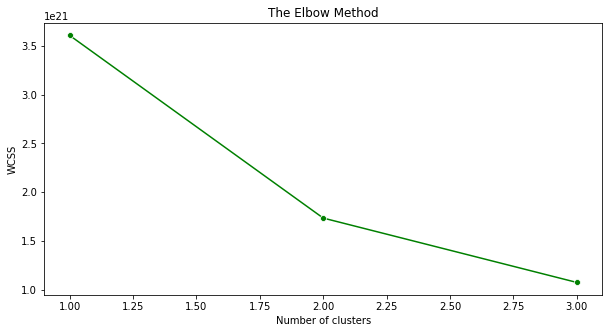

In [65]:
# First let check with the given k value 3
selected_metrics
wcss = []

# for loop 
for i in range(2, 5):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(selected_metrics)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 4), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

as we can see 3 is not the optimal number of kmeans cluster for this dataframe

In [66]:
# Lets check with the given k value 4
kmeans = KMeans(n_clusters = 4, random_state = 42)
y_kmeans = kmeans.fit_predict(normalized_data)
X = np.array(normalized_data)
y_kmeans

array([0, 3, 0, ..., 3, 3, 0])

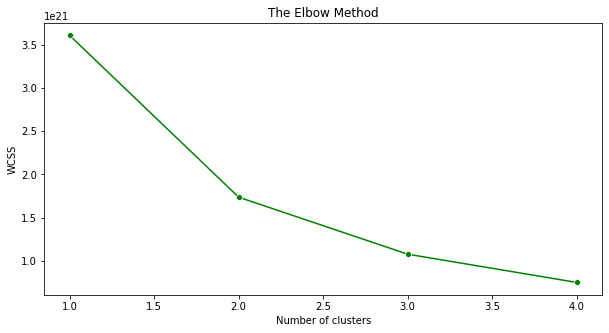

In [67]:
selected_metrics
wcss = []

# for loop 
for i in range(2, 6):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(selected_metrics)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 5), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

as we can see 4 is not the optimal number of kmeans cluster but it looks better than 3

In [68]:
# lets check with the given k value 5
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(normalized_data)
X = np.array(normalized_data)
y_kmeans

array([0, 2, 0, ..., 4, 4, 0])

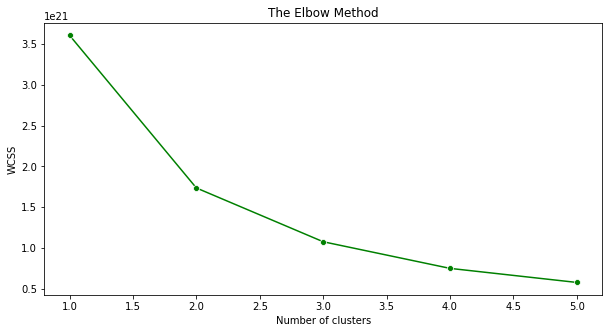

In [69]:
selected_metrics
wcss = []

# for loop 
for i in range(2, 7):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(selected_metrics)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 6), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

as we can see 5 is better than the other k values but lets check one more

In [70]:
# let check with the given k value 6
kmeans = KMeans(n_clusters = 6, random_state = 42)
y_kmeans = kmeans.fit_predict(normalized_data)
X = np.array(normalized_data)
y_kmeans

array([3, 4, 3, ..., 2, 2, 3])

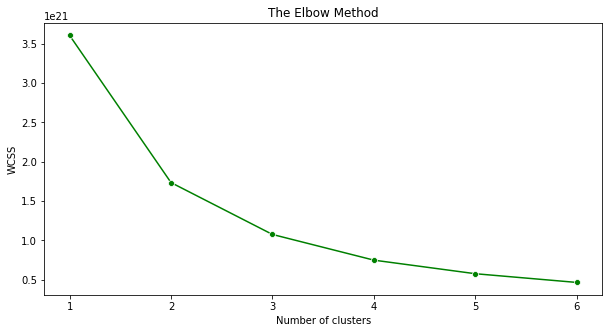

In [71]:
selected_metrics
wcss = []

# for loop 
for i in range(2, 8):
    
    # k-mean cluster model for different k values
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(selected_metrics)
    
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# figure size
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 7), wcss,marker='o',color='green')

# labeling
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [73]:
#save the dataframe
clustered_tellco_engagement_df.to_csv('../data/user_engagement_data.csv')

In [74]:
with open("../models/user_engagement.pkl", "wb") as f:
    pickle.dump(kmeans, f)